# SSVEP-EEG Signal Classification with VAE

Dataset: https://ieee-dataport.org/documents/ssvep-eeg-data-collection-using-emotiv-epoc#files

- 10 visual stimuli frequencies (7, 9, 11 and 13)
- 2 electrodes (LO, RO) 
- 128 samples per second, Stimuli was provided for 3.5s

[Reference]

Asanza, V., Avilés-Mendoza, K., Trivino-Gonzalez, H., Rosales-Uribe, F., Torres-Brunes, J., Loayza, F. R., ... & Tinoco-Egas, R. (2021). SSVEP-EEG signal classification based on emotiv EPOC BCI and raspberry Pi. IFAC-PapersOnLine, 54(15), 388-393.
https://www.sciencedirect.com/science/article/pii/S240589632101692X

Feature and Classification Process (https://www.hackster.io/dnhkng/aiot-artificial-intelligence-on-thoughts-f62249?fbclid=IwAR37RAC5nkgWCRNhmDS3xE5mImxpqV327rHSpHlX-QOBLZdv6dOOS0r5mdw#toc-summary-8)

### 1. Pre-Processing (FFT)

##### 1) Read EEG Data

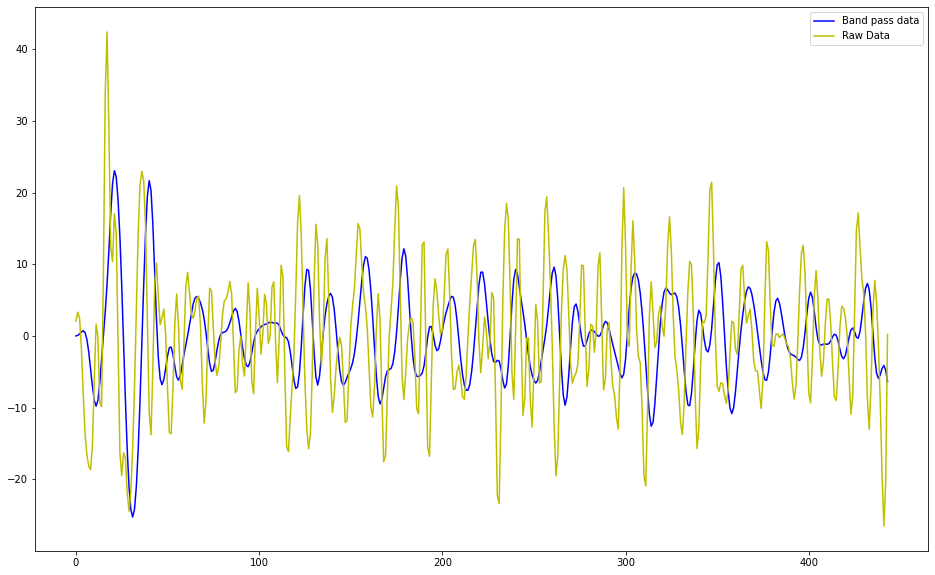

In [3]:
# Feature Extraction
import csv, os, math
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

DATASET = '../Dataset/3_Filtered_Data/'
stimuli = ['7Hz', '9Hz', '11Hz', '13Hz', 'Baseline']
channel = ['EEG.O1', 'EEG.O2']


# Read All File Lists
def getFileName(path_dir):
    file_list = os.listdir(path_dir)
    file_list.sort()
    dataList = []

    for f in file_list:
        if f.find('.csv') != -1:
            dataList.append(f)

    return dataList


# FFT (5~35 Hz)
def butter_bandpass_filter(data, lowcut, highcut, fs, order):
        nyq = 0.5 * fs  # sampling rate (fs)
        low = lowcut / nyq
        high = highcut / nyq
        sos = scipy.signal.butter(order, [low, high], analog=False, btype='band', output='sos')
        y = scipy.signal.sosfilt(sos, data)
        return y


# Read EEG Data
for s in stimuli:
    fList = getFileName(DATASET + s)

    for f in fList:
        trial = pd.read_csv(DATASET + s + '/' + f)
        trialFeature = []

        for c in channel:
            filtered = butter_bandpass_filter(trial[c] - np.mean(trial[c]), lowcut=5, highcut=35, fs=448, order=3)
            trialFeature.append([filtered])

        trialFeature = np.array(trialFeature)
        np.save('../Dataset/5_Butter Bandpass Filter/' + s + '_' + f, trialFeature)


plt.figure(figsize=(16,10))
plt.plot(filtered, c='b', label='Band pass data')
plt.plot(trial[c]- np.mean(trial[c]), c='y', label='Raw Data')
plt.legend()

##### Visualization

In [ ]:
# 각 조건별 FFT 결과 Visualization

DATASET = '../Dataset/5_Butter Bandpass Filter/'
stimuli = ['7Hz', '9Hz', '11Hz', '13Hz', 'Baseline']



##### 2) Load FFT Data

In [7]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

DATASET = '../Dataset/5_Butter Bandpass Filter/'
stimuli = ['7Hz', '9Hz', '11Hz', '13Hz', 'Baseline']


# Read All File Lists
def getFileName(path_dir):
    file_list = os.listdir(path_dir)
    file_list.sort()
    dataList = []

    for f in file_list:
        if f.find('.npy') != -1:
            dataList.append(f)

    return dataList


# Make X, y Format
npyList = getFileName(DATASET)
X1 = []  # O1
X2 = []  # O2
y = []

for n in npyList:
    data = np.load(DATASET + n)
    X1.append(data[0])
    X2.append(data[1])
    for s in stimuli:
        if s in n:
            y.append(s)


##### 3) Autoencoder (Feature Extraction)

In [ ]:
# Autoencoder @@

# 2개 채널일때 각각의 AE를 만들어 넣음 (한개로도 가능은 함) [pretrian model wight로 불러오기만 다르게 해서 하면 될듯]
# 앞서 뽑은 Feature도 붙여서 AE로 넣어봐도 좋을 듯

##### 4) Divide into Training, Valid, Test set

Divide the data to Training (70%), Validation (15%) and Test (15%) set.

In [6]:
X = []
for i in range(len(X1)):
    X.append(np.concatenate((X1[i], X2[i]), axis=0))


# Divide dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

3024
757


##### 5) Classification (SVM, KNN)

In [ ]:
# kNN, CNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

print(classifier.score(X_test, y_test))